In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from shutil import copyfile
import zipfile

In [6]:
files = [
         'train_prepared.zip',
         'test_prepared.zip',
         'extra_prepared.zip'
]

for f in files:
  copyfile(f'/content/gdrive/My Drive/tf/lab_4/{f}', f'./{f}')

'done'

'done'

In [7]:

for f in files:
    with zipfile.ZipFile(f"./{f}","r") as z:
        z.extractall(f"./")
        print(f"{f} extracted")

train_prepared.zip extracted
test_prepared.zip extracted
extra_prepared.zip extracted


In [0]:
import pandas as pd
import ast
import numpy as np

In [0]:
def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))

In [0]:
def from_list(array_string):
  return np.array(ast.literal_eval(array_string))

In [0]:
def load_ds_df(path):
  converters = {
      'label': from_np_array,
      'orig_label': from_list
      }
  df = pd.read_csv(f'{path}/data.csv', index_col=0, converters=converters)
  
  return df

In [12]:
origin_train_df = load_ds_df('train_prepared')
origin_train_df.head()

,file,len,orig_label,label
0,1.png,2,"[1, 9]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, ..."
1,2.png,2,"[2, 3]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, ..."
2,3.png,2,"[2, 5]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, ..."
3,4.png,2,"[9, 3]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, ..."
4,5.png,2,"[3, 1]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, ..."


In [13]:
origin_train_df['len'].value_counts()

2    18130
3     8691
1     5137
4     1434
5        9
Name: len, dtype: int64

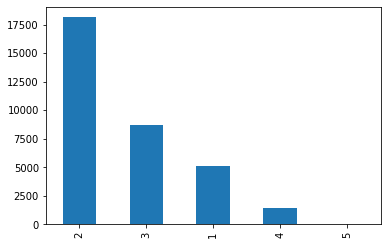

In [14]:
origin_train_df['len'].value_counts().plot.bar()

In [15]:
test_df = load_ds_df('test_prepared')
test_df.head()

,file,len,orig_label,label
0,1.png,1,[5],"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, ..."
1,2.png,3,"[2, 1, 0]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, ..."
2,3.png,1,[6],"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, ..."
3,4.png,1,[1],"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, ..."
4,5.png,1,[9],"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, ..."


In [0]:
def plot_curves(title, data, y_title, x_title='Epoch', legend=[], x_labels_offset = 0):
    fig = plt.figure(figsize=(8, 4))
        
    for row in data:
        x = range(x_labels_offset, len(row))
        plt.plot(x, row[x_labels_offset:])
    
    plt.title(title)
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.grid(True)
    plt.legend(legend, loc='upper left')
    plt.show()

In [0]:
from sklearn.model_selection import train_test_split

In [18]:
train_df, valid_df = train_test_split(origin_train_df, test_size=0.25, random_state=42)
len(train_df), len(valid_df)

(25050, 8351)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import pprint

In [0]:
TPU = False

In [0]:
batch_size = 128
target_size = (100, 100)

if TPU:
  batch_size = batch_size * 8

In [50]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        rotation_range=15,
        width_shift_range=0.15,
        height_shift_range=0.15,
        )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        directory='train_prepared',
        x_col="file",
        y_col="label",
        target_size=target_size,
        batch_size=batch_size,
        class_mode='raw'
  )

validation_generator = test_datagen.flow_from_dataframe(
        dataframe=valid_df,
        directory='train_prepared',
        x_col="file",
        y_col="label",
        target_size=target_size,
        batch_size=batch_size,
        class_mode='raw'
  )

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_df,
        directory='test_prepared',
        x_col="file",
        y_col="label",
        target_size=target_size,
        batch_size=batch_size,
        class_mode='raw'
  )

Found 25050 validated image filenames.
Found 8351 validated image filenames.
Found 13068 validated image filenames.


In [0]:
import matplotlib.pyplot as plt

In [0]:
def cat_label_to_human(label):
  label = np.argmax(label, axis=1)
  label = label[label != 10].tolist()

  return "".join([str(n) for n in label])

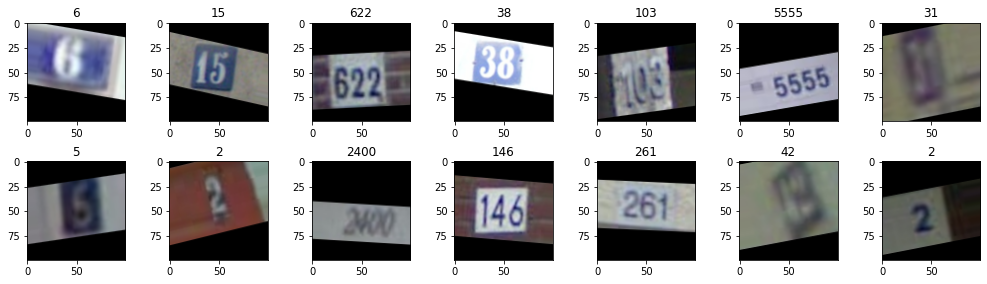

In [53]:
plt.figure(figsize=(14, 4))
for i in range(0, 14):
    plt.subplot(2, 7, i+1)
    X_batch, Y_batch = train_generator.__getitem__(i)
    image = X_batch[0]
    label = cat_label_to_human(Y_batch[0])

    plt.title(label)
    plt.imshow(image)
    
plt.tight_layout()
plt.show()

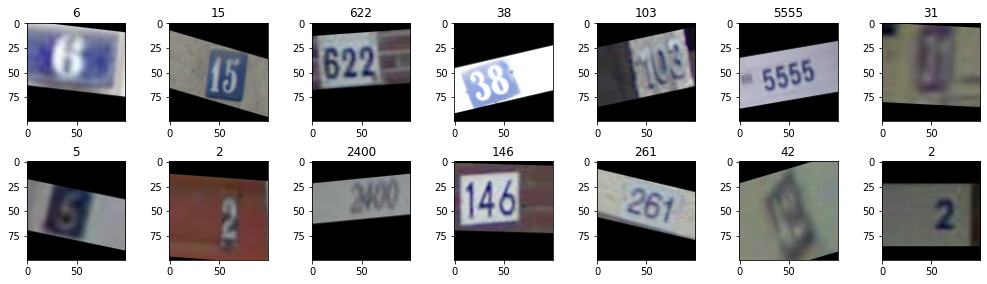

In [54]:
plt.figure(figsize=(14, 4))
for i in range(0, 14):
    plt.subplot(2, 7, i+1)
    X_batch, Y_batch = train_generator.__getitem__(i)
    image = X_batch[0]
    label = cat_label_to_human(Y_batch[0])

    plt.title(label)
    plt.imshow(image)
    
plt.tight_layout()
plt.show()

In [0]:
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Input, BatchNormalization
import tensorflow as tf

In [0]:
def generator_wrapper(generator):
    for batch_x, batch_y in generator:
        converted_y = np.stack(batch_y, axis=0)
        y_list = [converted_y[:, i] for i in range(converted_y.shape[1])]
        yield batch_x, y_list


In [0]:
def get_model():
    m_input = Input(shape=(*target_size, 3))
        
    l = Conv2D(32, (4, 4), activation='relu', padding='same', strides=1)(m_input)
    l = BatchNormalization()(l)
    l = MaxPooling2D(pool_size=(2, 2))(l) 
    #l = Dropout(0.1)(l)

    l = Conv2D(64, (4, 4), activation='relu', padding='same', strides=1)(l)
    l = BatchNormalization()(l)
    l = MaxPooling2D(pool_size=(2, 2))(l) 
    l = Dropout(0.25)(l)
    
    l = Conv2D(128, (4, 4), activation='relu', padding='same', strides=1)(l)
    l = BatchNormalization()(l)
    l = MaxPooling2D(pool_size=(2, 2))(l) 
    l = Dropout(0.25)(l)

    l = Conv2D(192, (4, 4), activation='relu', padding='same', strides=1)(l)
    l = BatchNormalization()(l)
    l = MaxPooling2D(pool_size=(2, 2))(l) 
    l = Dropout(0.25)(l)

    l = Flatten()(l)
    
    l = Dense(256, activation='relu')(l)    
    l = Dropout(0.5)(l)

    l = Dense(256, activation='relu')(l)    
    l = Dropout(0.5)(l)
    
    out1 = Dense(11, activation='softmax', name='n1')(l)
    out2 = Dense(11, activation='softmax', name='n2')(l)
    out3 = Dense(11, activation='softmax', name='n3')(l)
    out4 = Dense(11, activation='softmax', name='n4')(l)
    out5 = Dense(11, activation='softmax', name='n5')(l)
    
    model = Model(inputs=m_input, outputs=[out1, out2, out3, out4, out5])

    model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
    )
    
    return model

In [0]:
if TPU:
  tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print ('TPU address is', tpu_address)

  with tf.compat.v1.Session(tpu_address) as session:
    devices = session.list_devices()
    print('TPU devices:')
    pprint.pprint(devices)

In [0]:
if TPU:
  tf.config.experimental_connect_to_host('grpc://' + os.environ['COLAB_TPU_ADDR'])
  resolver = tf.distribute.cluster_resolver.TPUClusterResolver('grpc://' + os.environ['COLAB_TPU_ADDR'])
  tf.tpu.experimental.initialize_tpu_system(resolver)  
  strategy = tf.distribute.experimental.TPUStrategy(resolver) 

In [0]:
if TPU:
  tf.compat.v1.disable_eager_execution()
  with strategy.scope():
    m = get_model()
else:
  m = get_model()

In [61]:
m.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 100, 100, 32) 1568        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_8 (BatchNor (None, 100, 100, 32) 128         conv2d_8[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)  (None, 50, 50, 32)   0           batch_normalization_8[0][0]      
____________________________________________________________________________________________

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [0]:
saved_model_filename = 'model.hdf5'

checkpointer = ModelCheckpoint(saved_model_filename, verbose=1, save_best_only=True)

In [64]:
history = m.fit(
        generator_wrapper(train_generator),
        steps_per_epoch=len(train_generator),
        epochs=100,
        validation_data=generator_wrapper(validation_generator),
        validation_steps=len(validation_generator),
        callbacks=[checkpointer]
  )

Epoch 1/100
196/196 [==============================] - ETA: 0s - loss: 7.1873 - n1_loss: 0.2013 - n2_loss: 0.4372 - n3_loss: 1.3808 - n4_loss: 2.5640 - n5_loss: 2.6040 - n1_accuracy: 0.9823 - n2_accuracy: 0.9397 - n3_accuracy: 0.6706 - n4_accuracy: 0.1335 - n5_accuracy: 0.1004
Epoch 00001: val_loss improved from inf to 6.43236, saving model to model.hdf5
196/196 [==============================] - 97s 495ms/step - loss: 7.1873 - n1_loss: 0.2013 - n2_loss: 0.4372 - n3_loss: 1.3808 - n4_loss: 2.5640 - n5_loss: 2.6040 - n1_accuracy: 0.9823 - n2_accuracy: 0.9397 - n3_accuracy: 0.6706 - n4_accuracy: 0.1335 - n5_accuracy: 0.1004 - val_loss: 6.4324 - val_n1_loss: 0.0016 - val_n2_loss: 0.3053 - val_n3_loss: 1.2715 - val_n4_loss: 2.4826 - val_n5_loss: 2.3714 - val_n1_accuracy: 0.9999 - val_n2_accuracy: 0.9575 - val_n3_accuracy: 0.6980 - val_n4_accuracy: 0.1567 - val_n5_accuracy: 0.1130
Epoch 2/100
196/196 [==============================] - ETA: 0s - loss: 6.1091 - n1_loss: 0.0438 - n2_loss: 0.24

In [65]:
copyfile(f'./{saved_model_filename}', f'/content/gdrive/My Drive/tf/lab_4/{saved_model_filename}')

'/content/gdrive/My Drive/tf/lab_4/model.hdf5'

In [81]:
tf_lite_filename = 'model.tflite'

best_model = load_model(saved_model_filename)

#tf.compat.v1.enable_eager_execution()
converter = tf.compat.v1.lite.TFLiteConverter.from_keras_model_file(saved_model_filename)
#converter = tf.lite.TFLiteConverter.from_keras_model(best_model)
tflite_model = converter.convert()
open(tf_lite_filename, "wb").write(tflite_model)

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 38 variables.
INFO:tensorflow:Converted 38 variables to const ops.


9644792

In [82]:
copyfile(f'./{tf_lite_filename}', f'/content/gdrive/My Drive/tf/lab_4/{tf_lite_filename}')

'/content/gdrive/My Drive/tf/lab_4/model.tflite'

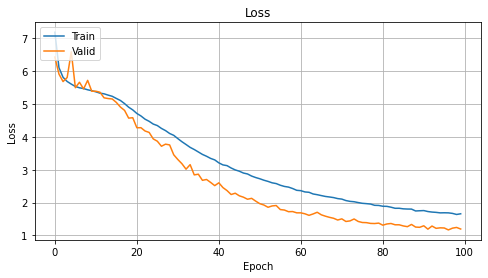

In [71]:
plot_curves(f'Loss', 
            [
              history.history['loss'], history.history['val_loss']
            ], 'Loss', 'Epoch',
            [
              'Train', 'Valid'
            ]
            )

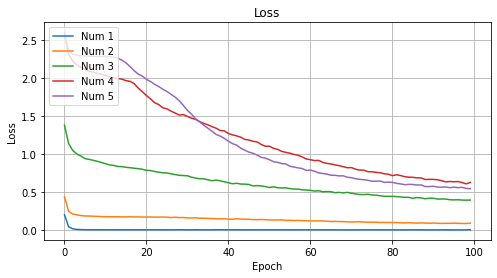

In [72]:
plot_curves(f'Loss', 
            [history.history[f'n{i+1}_loss'] for i in range(5)], 
            'Loss', 'Epoch',
            [f'Num {i+1}' for i in range(5)]
          )

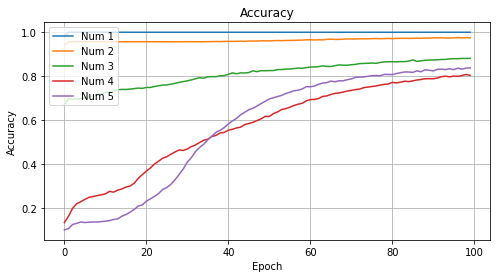

In [73]:
plot_curves(f'Accuracy', 
            [history.history[f'n{i+1}_accuracy'] for i in range(5)], 
            'Accuracy', 'Epoch',
            [f'Num {i+1}' for i in range(5)]
          )

In [0]:
results = best_model.evaluate(generator_wrapper(test_generator), steps=len(test_generator))

In [79]:
results

[1.154022037404255,
 0.0009003043,
 0.028309172,
 0.21916153,
 0.48210654,
 0.4235445,
 0.99984694,
 0.99303645,
 0.93441993,
 0.8644016,
 0.87695134]

In [80]:
avg_accuracy = sum([results[i] for i in range(6, 11)])/5

print("AVG Accuracy: %.2f%%\n" % (avg_accuracy*100))

for i in range(5):
  idx = i + 6
  print(f"Num {i+1} Accuracy: %.2f%%" % (results[idx]*100))

AVG Accuracy: 93.37%

Num 1 Accuracy: 99.98%
Num 2 Accuracy: 99.30%
Num 3 Accuracy: 93.44%
Num 4 Accuracy: 86.44%
Num 5 Accuracy: 87.70%
